In [1]:
#Import necessary libraries 
import pandas as pd #For data Frames and organization of data
import seaborn as sns #For visualizations
import numpy as np #For calculations
import matplotlib.pyplot as plt #For graphing plots
import calendar #to help with date inputs

#For predictive models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.utils import column_or_1d
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Read the CSV file using pandas
df = pd.read_csv("Airline Dataset Updated - v2.csv")

# Display the first few rows of the DataFrame
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time


In [2]:
# Displays basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

In [3]:
# Display the column names of the DataFrame
df.columns

Index(['Passenger ID', 'First Name', 'Last Name', 'Gender', 'Age',
       'Nationality', 'Airport Name', 'Airport Country Code', 'Country Name',
       'Airport Continent', 'Continents', 'Departure Date', 'Arrival Airport',
       'Pilot Name', 'Flight Status'],
      dtype='object')

In [4]:
# Check the number of missing values in each column
missingValues = df.isnull().sum()
print(missingValues)

# There's no missing data in this dataset so an issue of navigating incomplete data most likely will not be an issue. Now we can run into data being 
# filled but not filled in the same format as other data.

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64


In [49]:
# Checks for inconsistencies with dates
try:
    df['Departure Date'] = pd.to_datetime(df['Departure Date'])
    print("\nDeparture dates are in correct format.")
except ValueError:
    print("\nCorrecting date format...")
    df['Departure Date'] = pd.to_datetime(df['Departure Date'], format='%m/%d/%Y', errors='coerce')
    df['Departure Date'] = df['Departure Date'].dt.strftime('%m/%d/%Y')
    print("Date format corrected.")

# Had to check for this becasue I ran this a couple of times and some dates were not matching the format I wanted but in the excel sheet they were
# right but here coming out as wrong.

#Also helps where I run to_dateline for any data I am trying to manipulate.
#Have to run this twice to get "Date format corrected" for the dateline to work


Departure dates are in correct format.


1. What is the distribution of passenger ages? Are there any interesting
trends or outliers?

In [6]:
# Calculates the age statistics
ageData = df.groupby('Gender')['Age'].describe()
ageData

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,49021.0,45.51943,25.900328,1.0,23.0,46.0,68.0,90.0
Male,49598.0,45.48879,25.959245,1.0,23.0,46.0,68.0,90.0


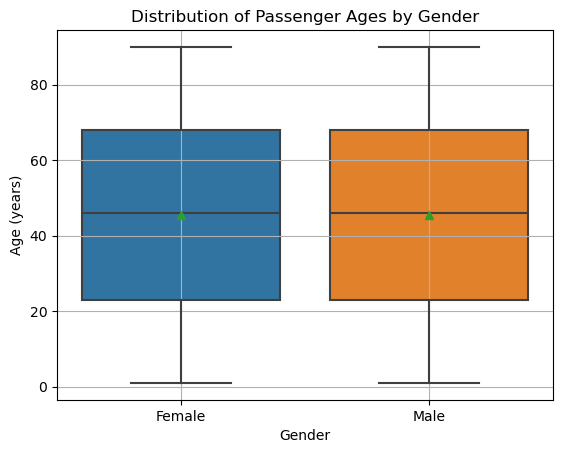

In [7]:
# Create a boxplot of age distribution
sns.boxplot(
    x = "Gender",
    y = "Age",
    showmeans=True,  # Show mean as a diamond
    data=df
)
plt.xlabel('Gender')
plt.ylabel('Age (years)')
plt.title('Distribution of Passenger Ages by Gender')
plt.grid(True)
plt.show()

In [8]:
# Calculate Distributions by Nationality and Continent
# Group data by nationality and calculate age statistics
ageStatsByNationality = df.groupby('Nationality')['Age'].describe()
ageStatsByNationality

,count,mean,std,min,25%,50%,75%,max
Nationality,,,,,,,,
Afghanistan,394.0,45.461929,25.690957,1.0,23.25,45.5,68.00,90.0
Aland Islands,20.0,46.300000,30.485717,5.0,19.00,41.5,76.75,88.0
Albania,445.0,45.858427,26.645998,1.0,22.00,46.0,71.00,90.0
Algeria,3.0,39.000000,23.643181,14.0,28.00,42.0,51.50,61.0
American Samoa,26.0,52.500000,23.373917,7.0,30.75,54.5,73.00,87.0
...,...,...,...,...,...,...,...,...
Wallis and Futuna,8.0,41.125000,27.226235,7.0,18.50,45.0,52.50,86.0
Western Sahara,5.0,42.200000,22.587607,22.0,26.00,30.0,62.00,71.0
Yemen,400.0,43.527500,26.423375,1.0,19.00,43.0,67.00,90.0


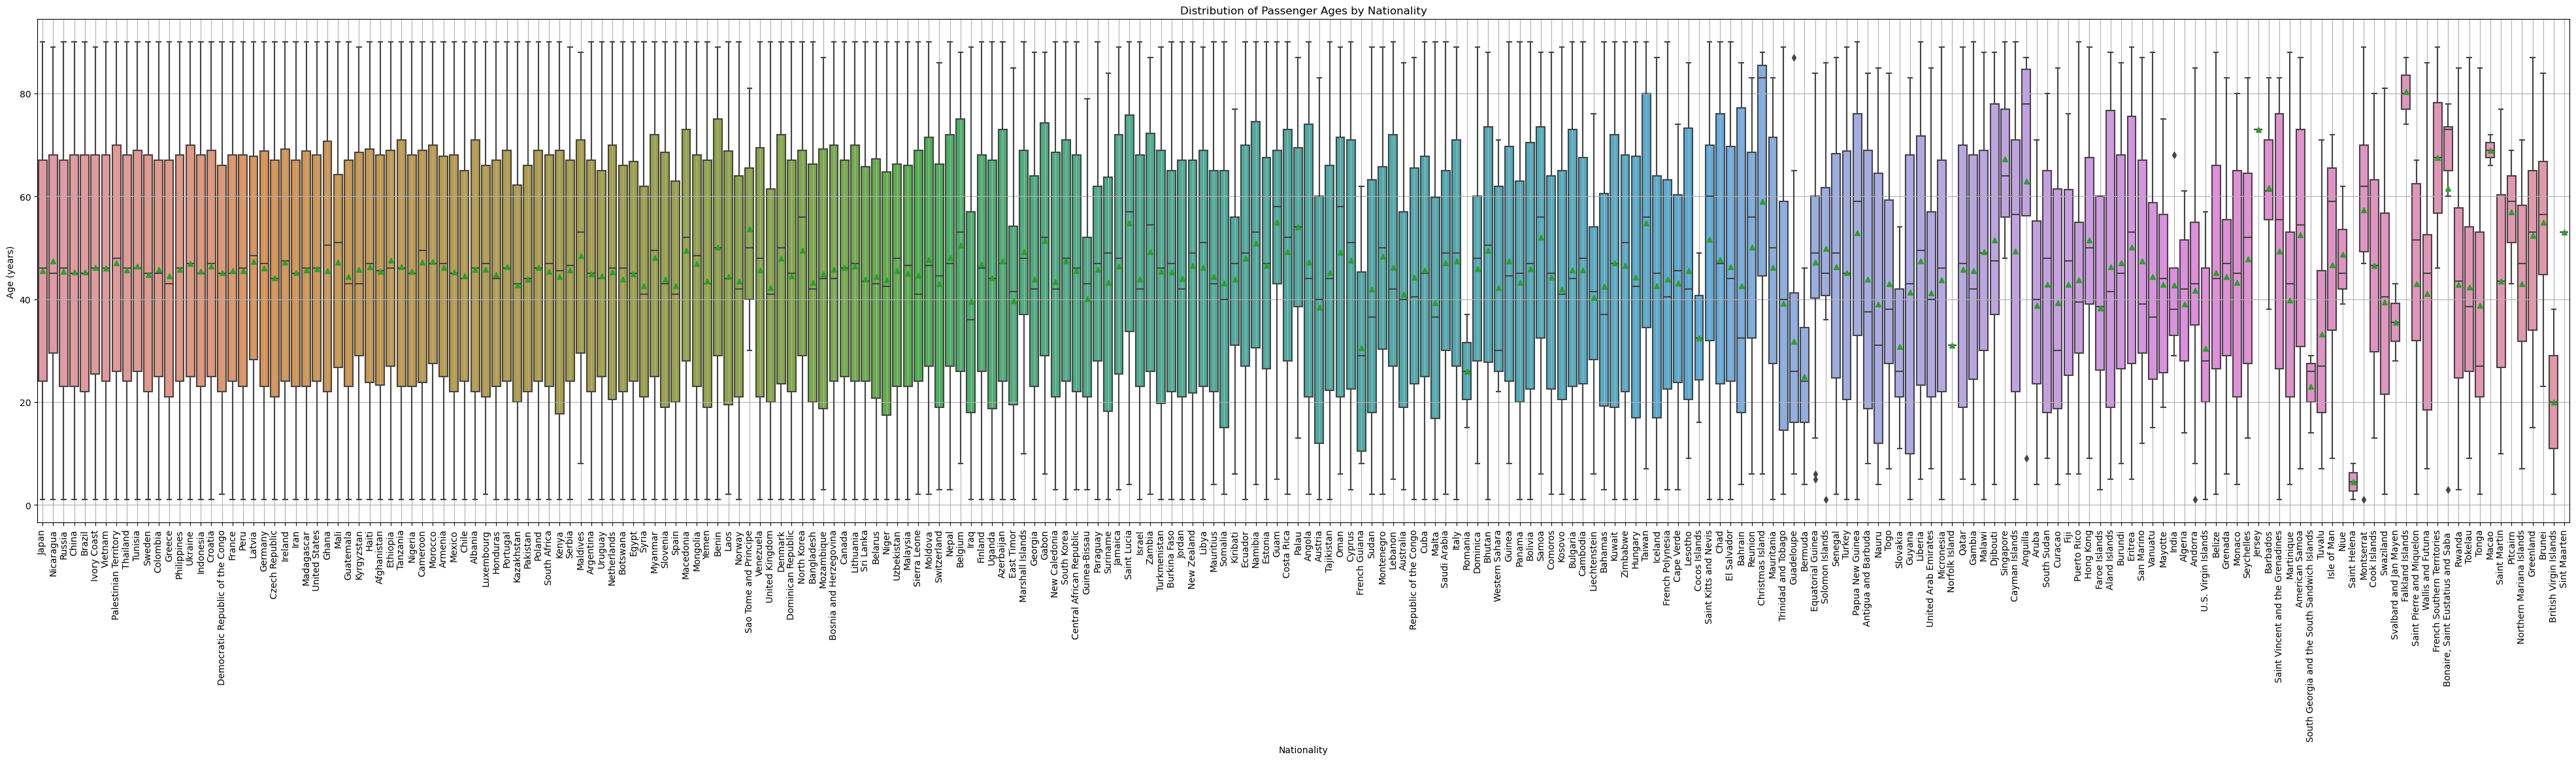

In [9]:
plt.figure(figsize=(50,10))

# Group data by nationality
sns.boxplot(
    x = "Nationality",
    y = "Age",
    showmeans=True,
    data=df
)

plt.xlabel('Nationality')
plt.xticks(rotation=90)
plt.ylabel('Age (years)')
plt.title('Distribution of Passenger Ages by Nationality')
plt.grid(True)
plt.show()

In [10]:
# Calculate Distributions by Nationality and Continent
# Group data by nationality and calculate age statistics
ageStatsByDepartureContinent = df.groupby('Airport Continent')['Age'].describe()
ageStatsByDepartureContinent

,count,mean,std,min,25%,50%,75%,max
Airport Continent,,,,,,,,
AF,11030.0,45.635993,25.772271,1.0,24.0,46.0,68.0,90.0
AS,18637.0,45.653861,26.006317,1.0,23.0,46.0,68.0,90.0
EU,12335.0,45.220592,25.868273,1.0,23.0,45.0,67.0,90.0
NAM,32033.0,45.581619,25.911481,1.0,23.0,46.0,68.0,90.0
OC,13866.0,45.371628,26.124940,1.0,23.0,45.0,68.0,90.0
SAM,10718.0,45.373204,25.832535,1.0,23.0,46.0,68.0,90.0


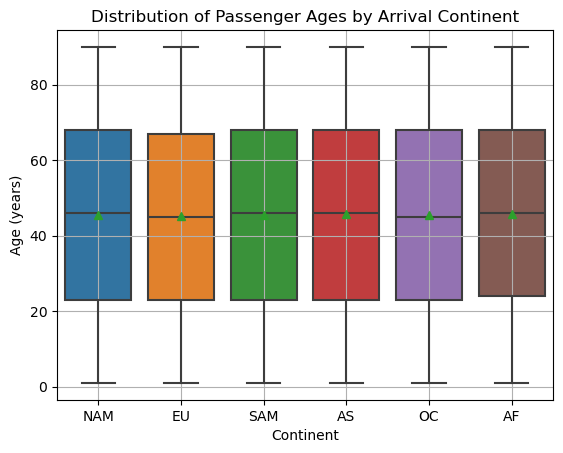

In [12]:
# Group data by continent
sns.boxplot(
    x = "Airport Continent",
    y = "Age",
    showmeans=True,
    data=df
)
plt.xlabel('Continent')
plt.ylabel('Age (years)')
plt.title('Distribution of Passenger Ages by Arrival Continent')
plt.grid(True)
plt.show()

In [13]:
# Calculate Interquartile Range (IQR)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Identify potential outliers based on IQR rule
lBound = Q1 - 1.5 * IQR
uBound = Q3 + 1.5 * IQR
outliers = df[(df['Age'] < lBound) | (df['Age'] > uBound)]

# Analyze outliers
if not outliers.empty:
  print("Potential outliers:", outliers)
else:
  print("No outliers detected based on IQR rule.")

No outliers detected based on IQR rule.


2. What is the gender distribution among the passengers? Is there a
significant difference?

In [14]:
#Analyzes gender distrubution
#Total count by gender
genderCount = df['Gender'].value_counts()
genderCount.reset_index()

,Gender,count
0,Male,49598
1,Female,49021


In [15]:
#Analyzes gender distrubution
#Percentage by gender
numOfPassengers = len(df)
percentOfGender = (genderCount / numOfPassengers) * 100
percentOfGender

Gender
Male      50.29254
Female    49.70746
Name: count, dtype: float64

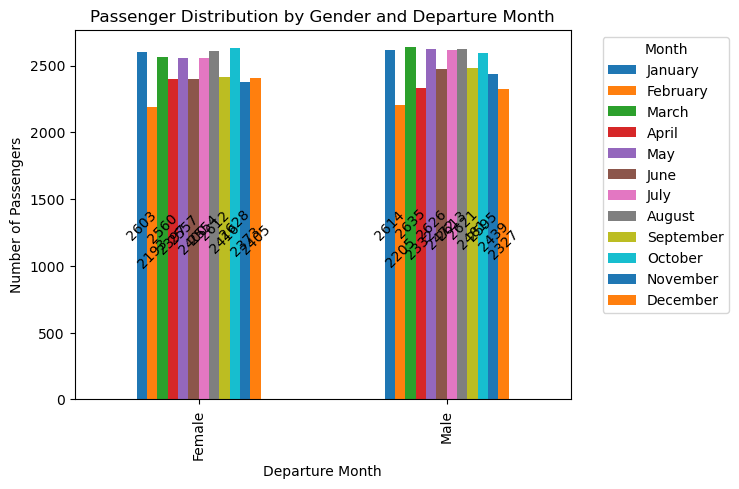

In [18]:
# Gender-specific travel patterns for departures based on month
genderDepartureMonthPreferences = df.groupby(['Gender', df['Departure Date'].dt.month])['Passenger ID'].count().unstack()

# Replace the month numbers with names
genderDepartureMonthPreferences.columns = genderDepartureMonthPreferences.columns.map(lambda x: calendar.month_name[int(x)])

ax = genderDepartureMonthPreferences.plot(kind='bar', stacked=False)

# Annotate each bar with the total count
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center',rotation=90)
    
plt.xlabel('Departure Month')
plt.ylabel('Number of Passengers')
plt.title('Passenger Distribution by Gender and Departure Month')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

3. Which nationality is most common among the passengers? How does this compare to the overall population distribution?

In [19]:
# Nationality with the highest count
mostCommonNationality = df['Nationality'].mode()[0]

# Count passengers by nationality
nationalityCount = df['Nationality'].value_counts()

# Percentage of most common nationality (optional)
passengerTotal = len(df)
percentOfCommonNationality = (nationalityCount[mostCommonNationality] / passengerTotal) * 100

print("Most common nationality among passengers:", mostCommonNationality)
if 'percentOfCommonNationality' in locals():
    print("Percentage of most common nationality of", mostCommonNationality, "is", percentOfCommonNationality, "%")
print("Nationality counts:\n")
nationalityCount.reset_index()

Most common nationality among passengers: China
Percentage of most common nationality of China is 18.573500035490117 %
Nationality counts:



,Nationality,count
0,China,18317
1,Indonesia,10559
2,Russia,5693
3,Philippines,5239
4,Brazil,3791
...,...,...
235,Romania,2
236,British Virgin Islands,2
237,Jersey,1
238,Norfolk Island,1


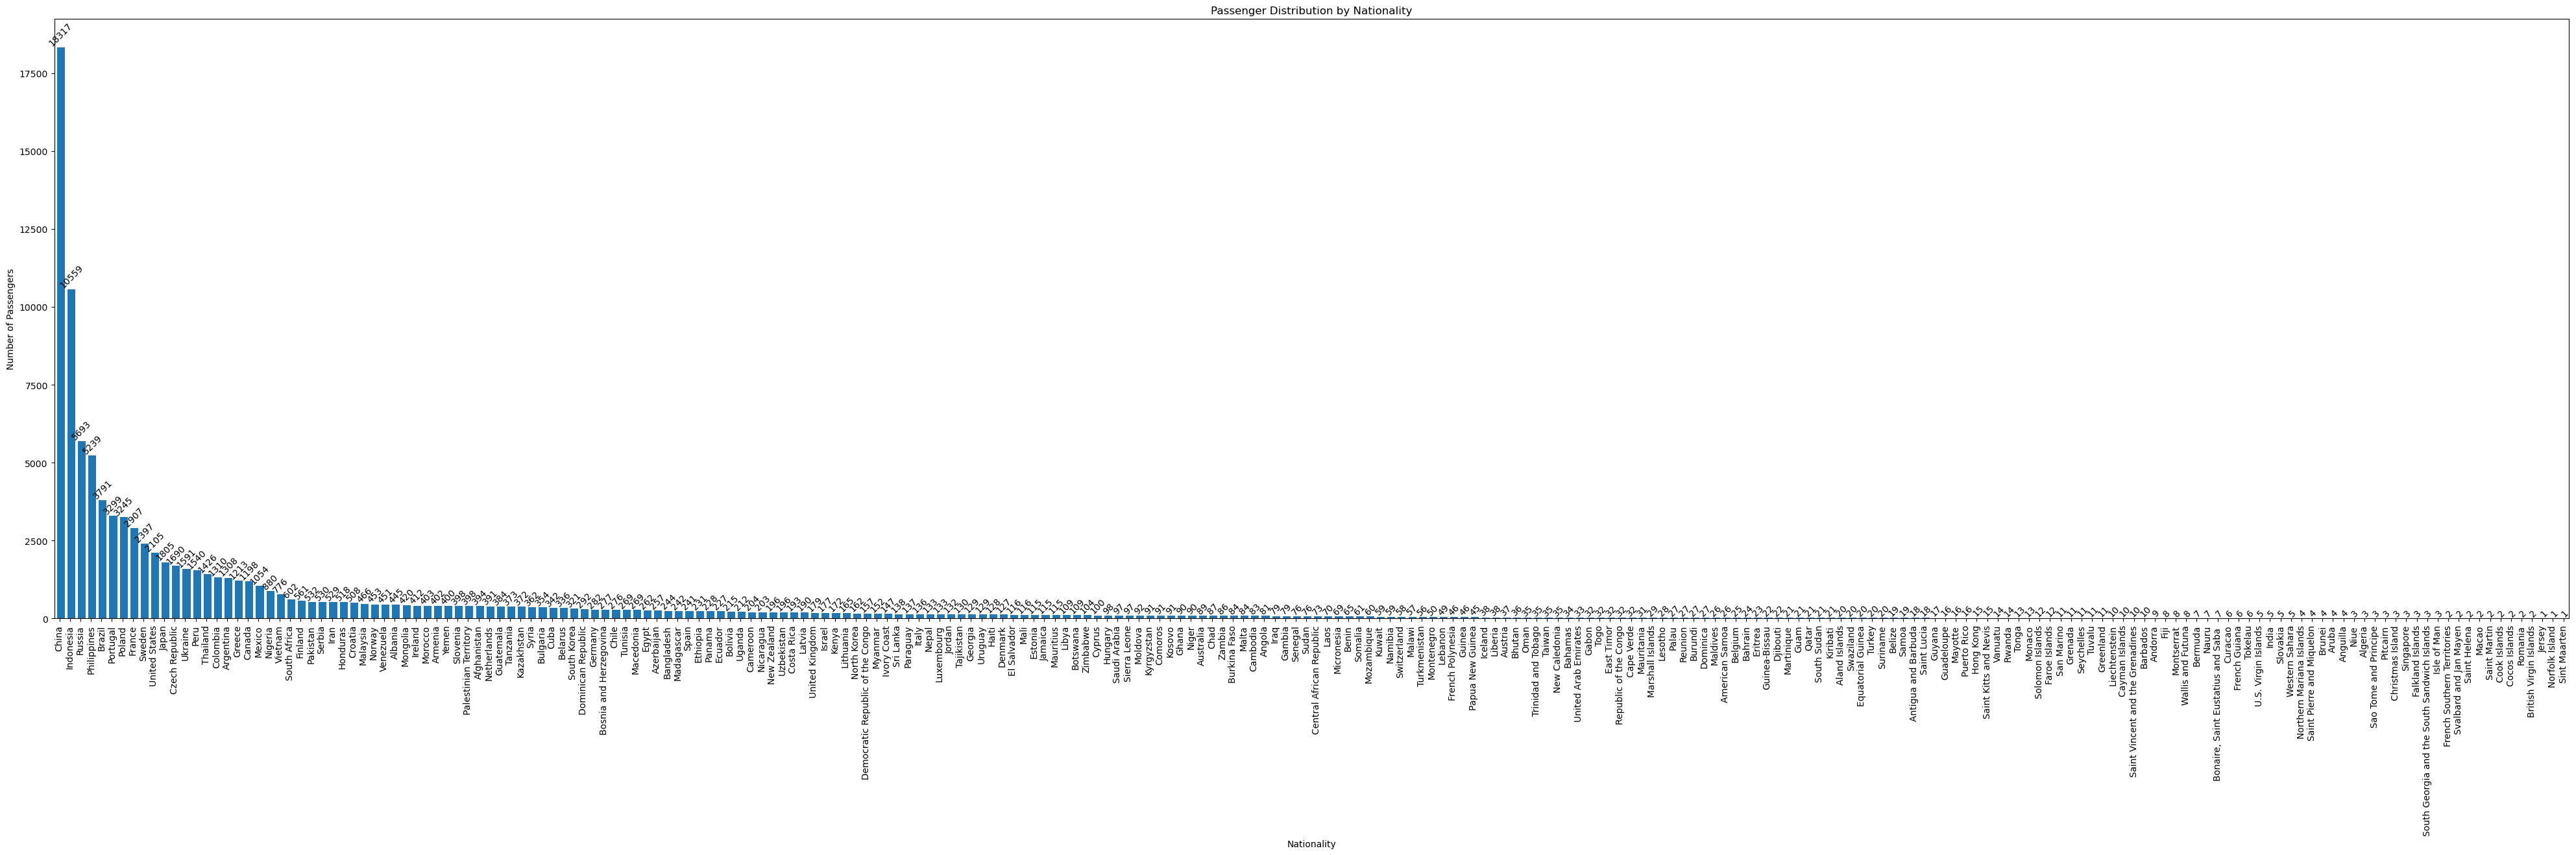

In [20]:
# Graph the distributions of nationalities
plt.figure(figsize=(50,12))
ax = nationalityCount.plot(kind='bar')

for patch in ax.patches:
    patch.set_width(.75)

# Annotate each bar with the total count
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    total = round(height, 2)
    ax.annotate(f'{total:.0f}', (x + width / 2, y + height), ha='center', va='bottom', rotation=45)
    
plt.xlabel('Nationality')
plt.ylabel('Number of Passengers')
plt.title('Passenger Distribution by Nationality')
plt.show()

4. Which airport is most frequented for departures? Are there any airports 
that are particularly popular or unpopular?

In [21]:
# Airport with the most departures
mostDepartures = df['Airport Name'].mode()[0]

# Count departures by airport
departureCount = df['Airport Name'].value_counts()

# Percentage of departures from most frequent airport
totalDepartures = len(df)
percentOfDepartures = (departureCount[mostDepartures] / totalDepartures) * 100

print("Most frequent departured airport is", mostDepartures)
if 'percentOfDepartures' in locals():
  print("Percentage of departures from", mostDepartures, "is", percentOfDepartures, "%")
print("Departure airport counts:\n")
departureCount.reset_index()

Most frequent departured airport is San Pedro Airport
Percentage of departures from San Pedro Airport is 0.04360214563116641 %
Departure airport counts:



,Airport Name,count
0,San Pedro Airport,43
1,Santa Maria Airport,38
2,Böblingen Flugfeld,36
3,Santa Ana Airport,35
4,San Fernando Airport,31
...,...,...
9057,Balıkesir Merkez Airport,2
9058,Arkalyk North Airport,2
9059,Juba International Airport,2
9060,Falcon State Airport,1


5. What is the distribution of flight statuses? Are most flights on time, or 
are there a significant number of delays or cancellations?

In [22]:
# Count flights by status
flightStatusCount = df['Flight Status'].value_counts()
flightStatusCount.reset_index()

,Flight Status,count
0,Cancelled,32942
1,On Time,32846
2,Delayed,32831


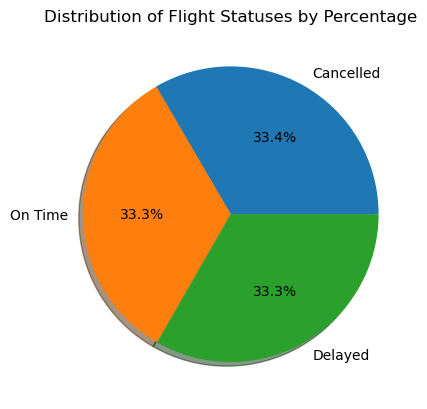

In [23]:
# Get pie chart slice labels and values
labels = flightStatusCount.index.to_numpy()
values = flightStatusCount.to_numpy()

# Create a pie chart
plt.pie(values, labels=labels, autopct="%1.1f%%", shadow=True)  # Format percentages
plt.title("Distribution of Flight Statuses by Percentage")
plt.show()

6. What is the average age of passengers for each gender? Is there a 
significant difference between the average ages of male and female passengers?

In [24]:
# Group data by gender and calculate age statistics
ageStatsByGender = df.groupby('Gender')['Age'].describe()

# Extract average age for each gender
avgMaleAge = ageStatsByGender.loc['Male', 'mean']
avgFemaleAge = ageStatsByGender.loc['Female', 'mean']

print("Average age (Male):", avgMaleAge)
print("Average age (Female):", avgFemaleAge)

Average age (Male): 45.488789870559295
Average age (Female): 45.51943044817527


7. Which pilots have the most flights? Are there any pilots who have 
significantly more flights than others?

In [25]:
# Assuming 'df' is your DataFrame and 'Pilot Name' is the pilot identification column
pilotFlightCount = df['Pilot Name'].value_counts()

# Check for ties in the highest count
mostFlightCount = pilotFlightCount.max()
pilotWithMostFlights = pilotFlightCount[pilotFlightCount == mostFlightCount].index.tolist()

# Analyze based on ties
if len(pilotWithMostFlights) == 1:
  print("Pilot with the most flights:", pilotWithMostFlights[0])
  print("Number of flights:", mostFlightCount)
else:
  print("Pilots with the most flights (tied):")
  for pilot in pilotWithMostFlights:
    print(pilot)
  print("Number of flights:", mostFlightCount)

Pilots with the most flights (tied):
Kally Askell
Byrle Schooling
Valeda Pratty
Demetris Atherley
Conant Amesbury
Kimmie Godding
Otes Horsey
Berky Battaille
Gustaf Yemm
Ethan Desbrow
Ofilia MacTeggart
Karalynn Taile
Aline Delap
Janela Eyres
Number of flights: 2


8. What is the distribution of departure dates? Are there certain times of the year when travel is more common?

In [26]:
# Assuming 'Departure Date' is a datetime format
df['Departure Date'] = pd.to_datetime(df['Departure Date'])

# Day of departure
df['Departure Day'] = df['Departure Date'].dt.day

# Count by departure day
departureDayCount = df['Departure Day'].value_counts()

# Reset index
departureDayCount = departureDayCount.reset_index()

# Rename columns
departureDayCount.columns = ['Day', 'Count']

# Sort by day
departureDayCount = departureDayCount.sort_values('Day')

departureDayCount.reset_index()

,index,Day,Count
0,0,13.0,3370
1,3,14.0,3311
2,1,15.0,3335
3,5,16.0,3294
4,6,17.0,3285
5,9,18.0,3266
6,12,19.0,3211
7,8,20.0,3268
8,14,21.0,3173
9,2,22.0,3323


In [27]:
# Assuming 'Departure Date' is a datetime format
df['Departure Date'] = pd.to_datetime(df['Departure Date'])

# Month of departure
df['Departure Month'] = df['Departure Date'].dt.month_name()

# Month count by departure month
departureMonthCount = df['Departure Month'].value_counts()

# Reset index
departureMonthCount = departureMonthCount.reset_index()

# Rename columns
departureMonthCount.columns = ['Month', 'Count']

# Sort by month
monthOrder = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
departureMonthCount['Month'] = pd.Categorical(departureMonthCount['Month'], categories=monthOrder, ordered=True)
departureMonthCount = departureMonthCount.sort_values('Month')

departureMonthCount.reset_index()

#Index was used to get the largest to smallest for total number of departures.

,index,Month,Count
0,2,January,5217
1,11,February,4398
2,3,March,5195
3,10,April,4729
4,4,May,5183
5,7,June,4872
6,5,July,5167
7,0,August,5233
8,6,September,4897
9,1,October,5223


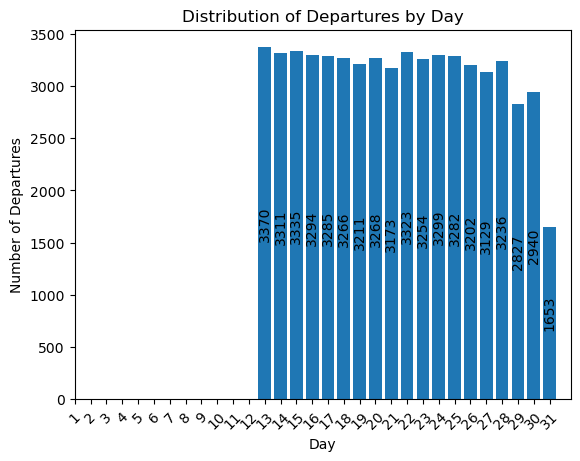

In [28]:
# Sort by day
departureDayCount = departureDayCount.sort_values('Day')

# Get day labels and counts
labels = departureDayCount['Day'].to_numpy()
counts = departureDayCount['Count'].to_numpy()

# Create a bar chart
bars = plt.bar(labels, counts)
plt.xlabel("Day")
plt.ylabel("Number of Departures")
plt.title("Distribution of Departures by Day")

# Set xticks to list each day
plt.xticks(range(1, 32), rotation=45)

# Add total to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, yval, ha='center', va='center', rotation = 90)

plt.show()

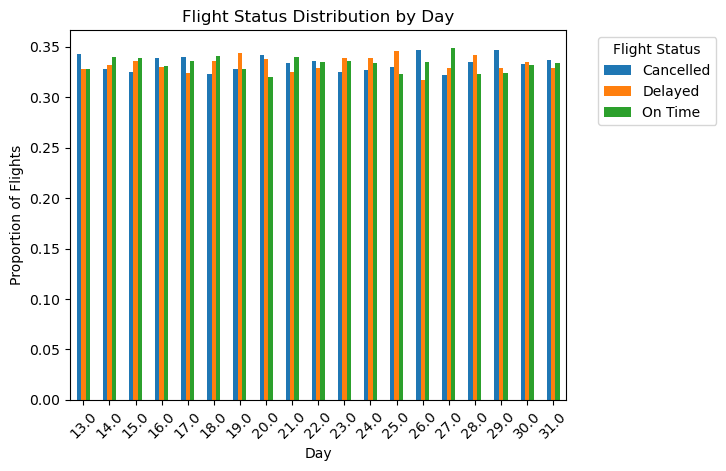

In [29]:
# Correlation between departure dates and flight status
flightStatusByDays = df.groupby(df['Departure Date'].dt.day)['Flight Status'].value_counts(normalize=True).unstack()
flightStatusByDays.plot(kind='bar', stacked=False)

plt.xlabel('Day')
plt.ylabel('Proportion of Flights')
plt.title('Flight Status Distribution by Day')
plt.legend(title='Flight Status',bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)

plt.show()

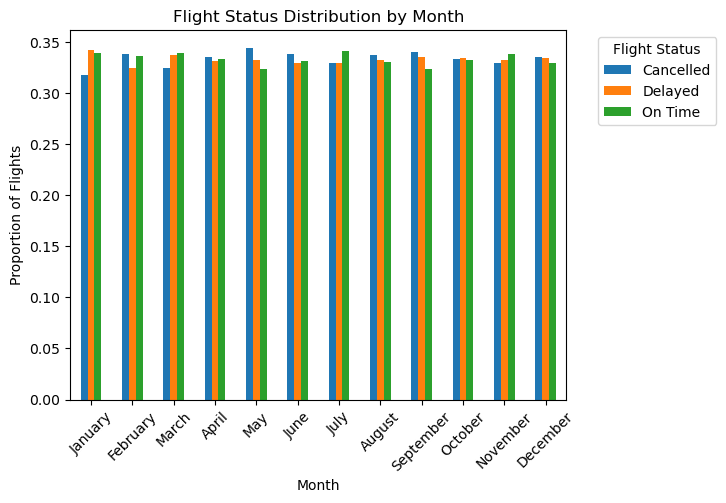

In [30]:
# Correlation between departure dates and flight status
flightStatusByMonths = df.groupby(df['Departure Date'].dt.month)['Flight Status'].value_counts(normalize=True).unstack()
flightStatusByMonths.plot(kind='bar', stacked=False)

plt.xlabel('Month')
plt.ylabel('Proportion of Flights')
plt.title('Flight Status Distribution by Month')
plt.legend(title='Flight Status',bbox_to_anchor=(1.05, 1), loc='upper left')

# Change x-axis labels to month names
plt.xticks(range(12), calendar.month_name[1:13], rotation=45)

plt.show()

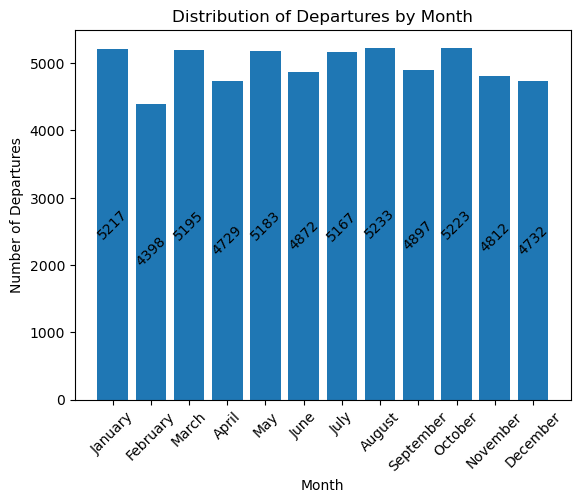

In [31]:
# Convert month names to month numbers
departureMonthCount['Month_Number'] = departureMonthCount['Month'].apply(lambda x: 
                                                                         list(calendar.month_name).index(x))

# Sort by month number
departureMonthCount = departureMonthCount.sort_values('Month_Number')

# Get month labels and counts
labels = departureMonthCount['Month'].to_numpy()
counts = departureMonthCount['Count'].to_numpy()

# Create a bar chart
bars = plt.bar(labels, counts)
plt.xlabel("Month")
plt.ylabel("Number of Departures")
plt.title("Distribution of Departures by Month")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add total to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, yval, ha='center', va='center', rotation = 45)

plt.show()

9. Which continents are most frequently traveled to? Are there any continents
that are particularly popular or unpopular destinations?

In [32]:
# Continent counts
continentCount = df['Continents'].value_counts(normalize=True) * 100  # Calculate percentages

# Print results
print("Travel Distribution by Continent (percentages):")
continentCount.reset_index()

Travel Distribution by Continent (percentages):


,Continents,proportion
0,North America,32.481570
1,Asia,18.897981
2,Oceania,14.060171
3,Europe,12.507732
4,Africa,11.184457
5,South America,10.868088


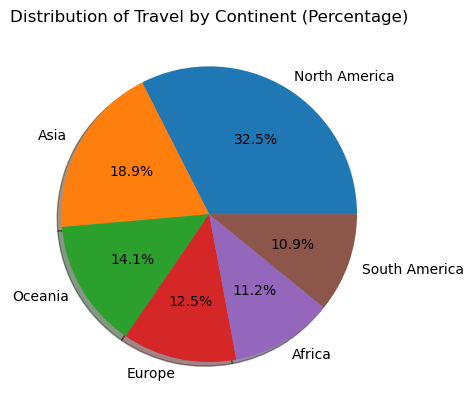

In [33]:
# Get pie chart slice labels and values
labels = continentCount.index.to_numpy()
values = continentCount.to_numpy()

# Create a pie chart
plt.pie(values, labels=labels, autopct="%1.1f%%", shadow=True)  # Format percentages
plt.title("Distribution of Travel by Continent (Percentage)")
plt.show()

10. What is the relationship between the nationality of the passenger and 
the continent of the arrival airport? Are there certain nationalities that 
tend to travel to certain continents more than others?

In [34]:
# Group by nationality and calculate arrival continent counts
nationalityTravelCount = df.groupby('Nationality')['Arrival Airport'].value_counts().unstack()

# Print the table
print("Nationality Travel Counts by Arrival Airport:")
nationalityTravelCount.fillna(0.0) #fills in NaN values with 0.0 to make the data look cleaner

#Table creates a matrix between Nationality and Arrival Airport

Nationality Travel Counts by Arrival Airport:


Arrival Airport,-,0,AAA,AAB,AAC,AAD,AAE,AAF,AAG,AAH,...,ZVG,ZVK,ZWA,ZWL,ZXT,ZYI,ZYL,ZZO,ZZU,ZZV
Nationality,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aland Islands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albania,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Western Sahara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yemen,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


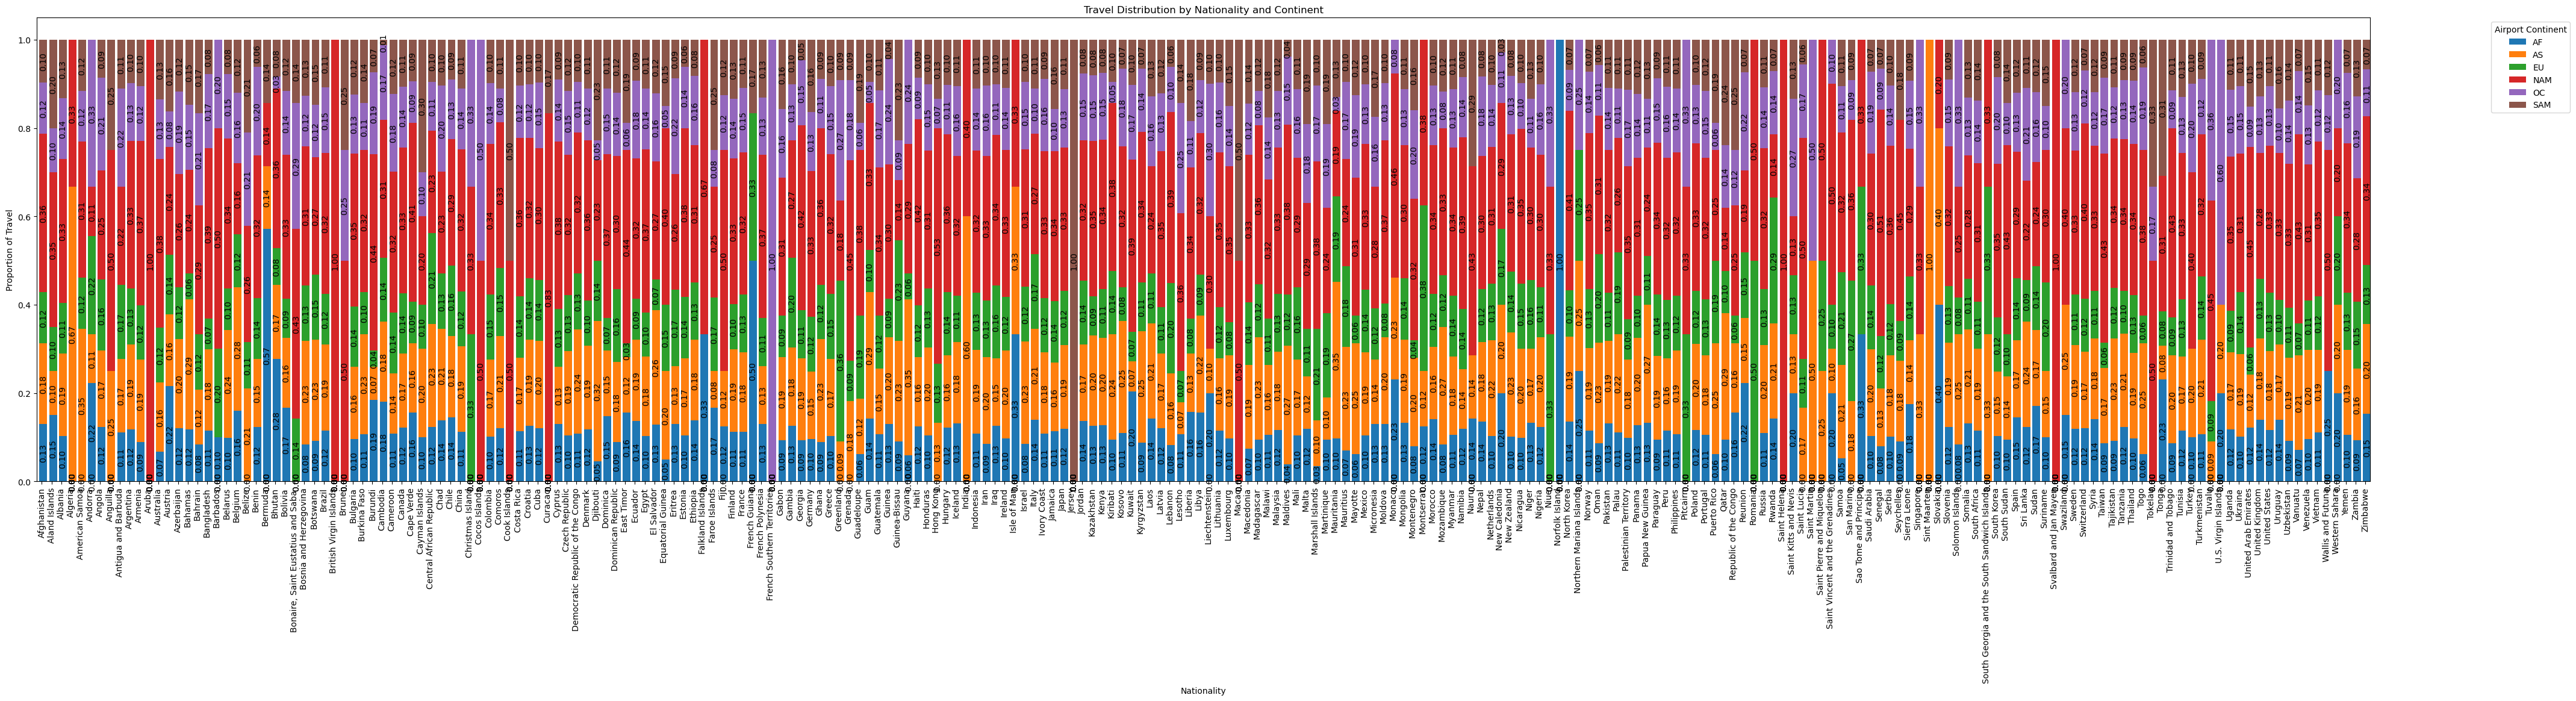

In [35]:
# Nationalities of people that are arriving to specific continents (porportions)
nationalityContinentPreferences = df.groupby('Nationality')['Airport Continent'].value_counts(normalize=True).unstack()
ax = nationalityContinentPreferences.plot(kind='bar', stacked=True, figsize=(50,10))

for patch in ax.patches:
    patch.set_width(.8)

# Annotate each bar with the total count
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    total = round(height, 2)
    ax.annotate(f'{total:.2f}', (x + width / 2, y + height / 2), ha='center', va='center', rotation=90)


plt.xlabel('Nationality')
plt.ylabel('Proportion of Travel')
plt.title('Travel Distribution by Nationality and Continent')
plt.legend(title='Airport Continent',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

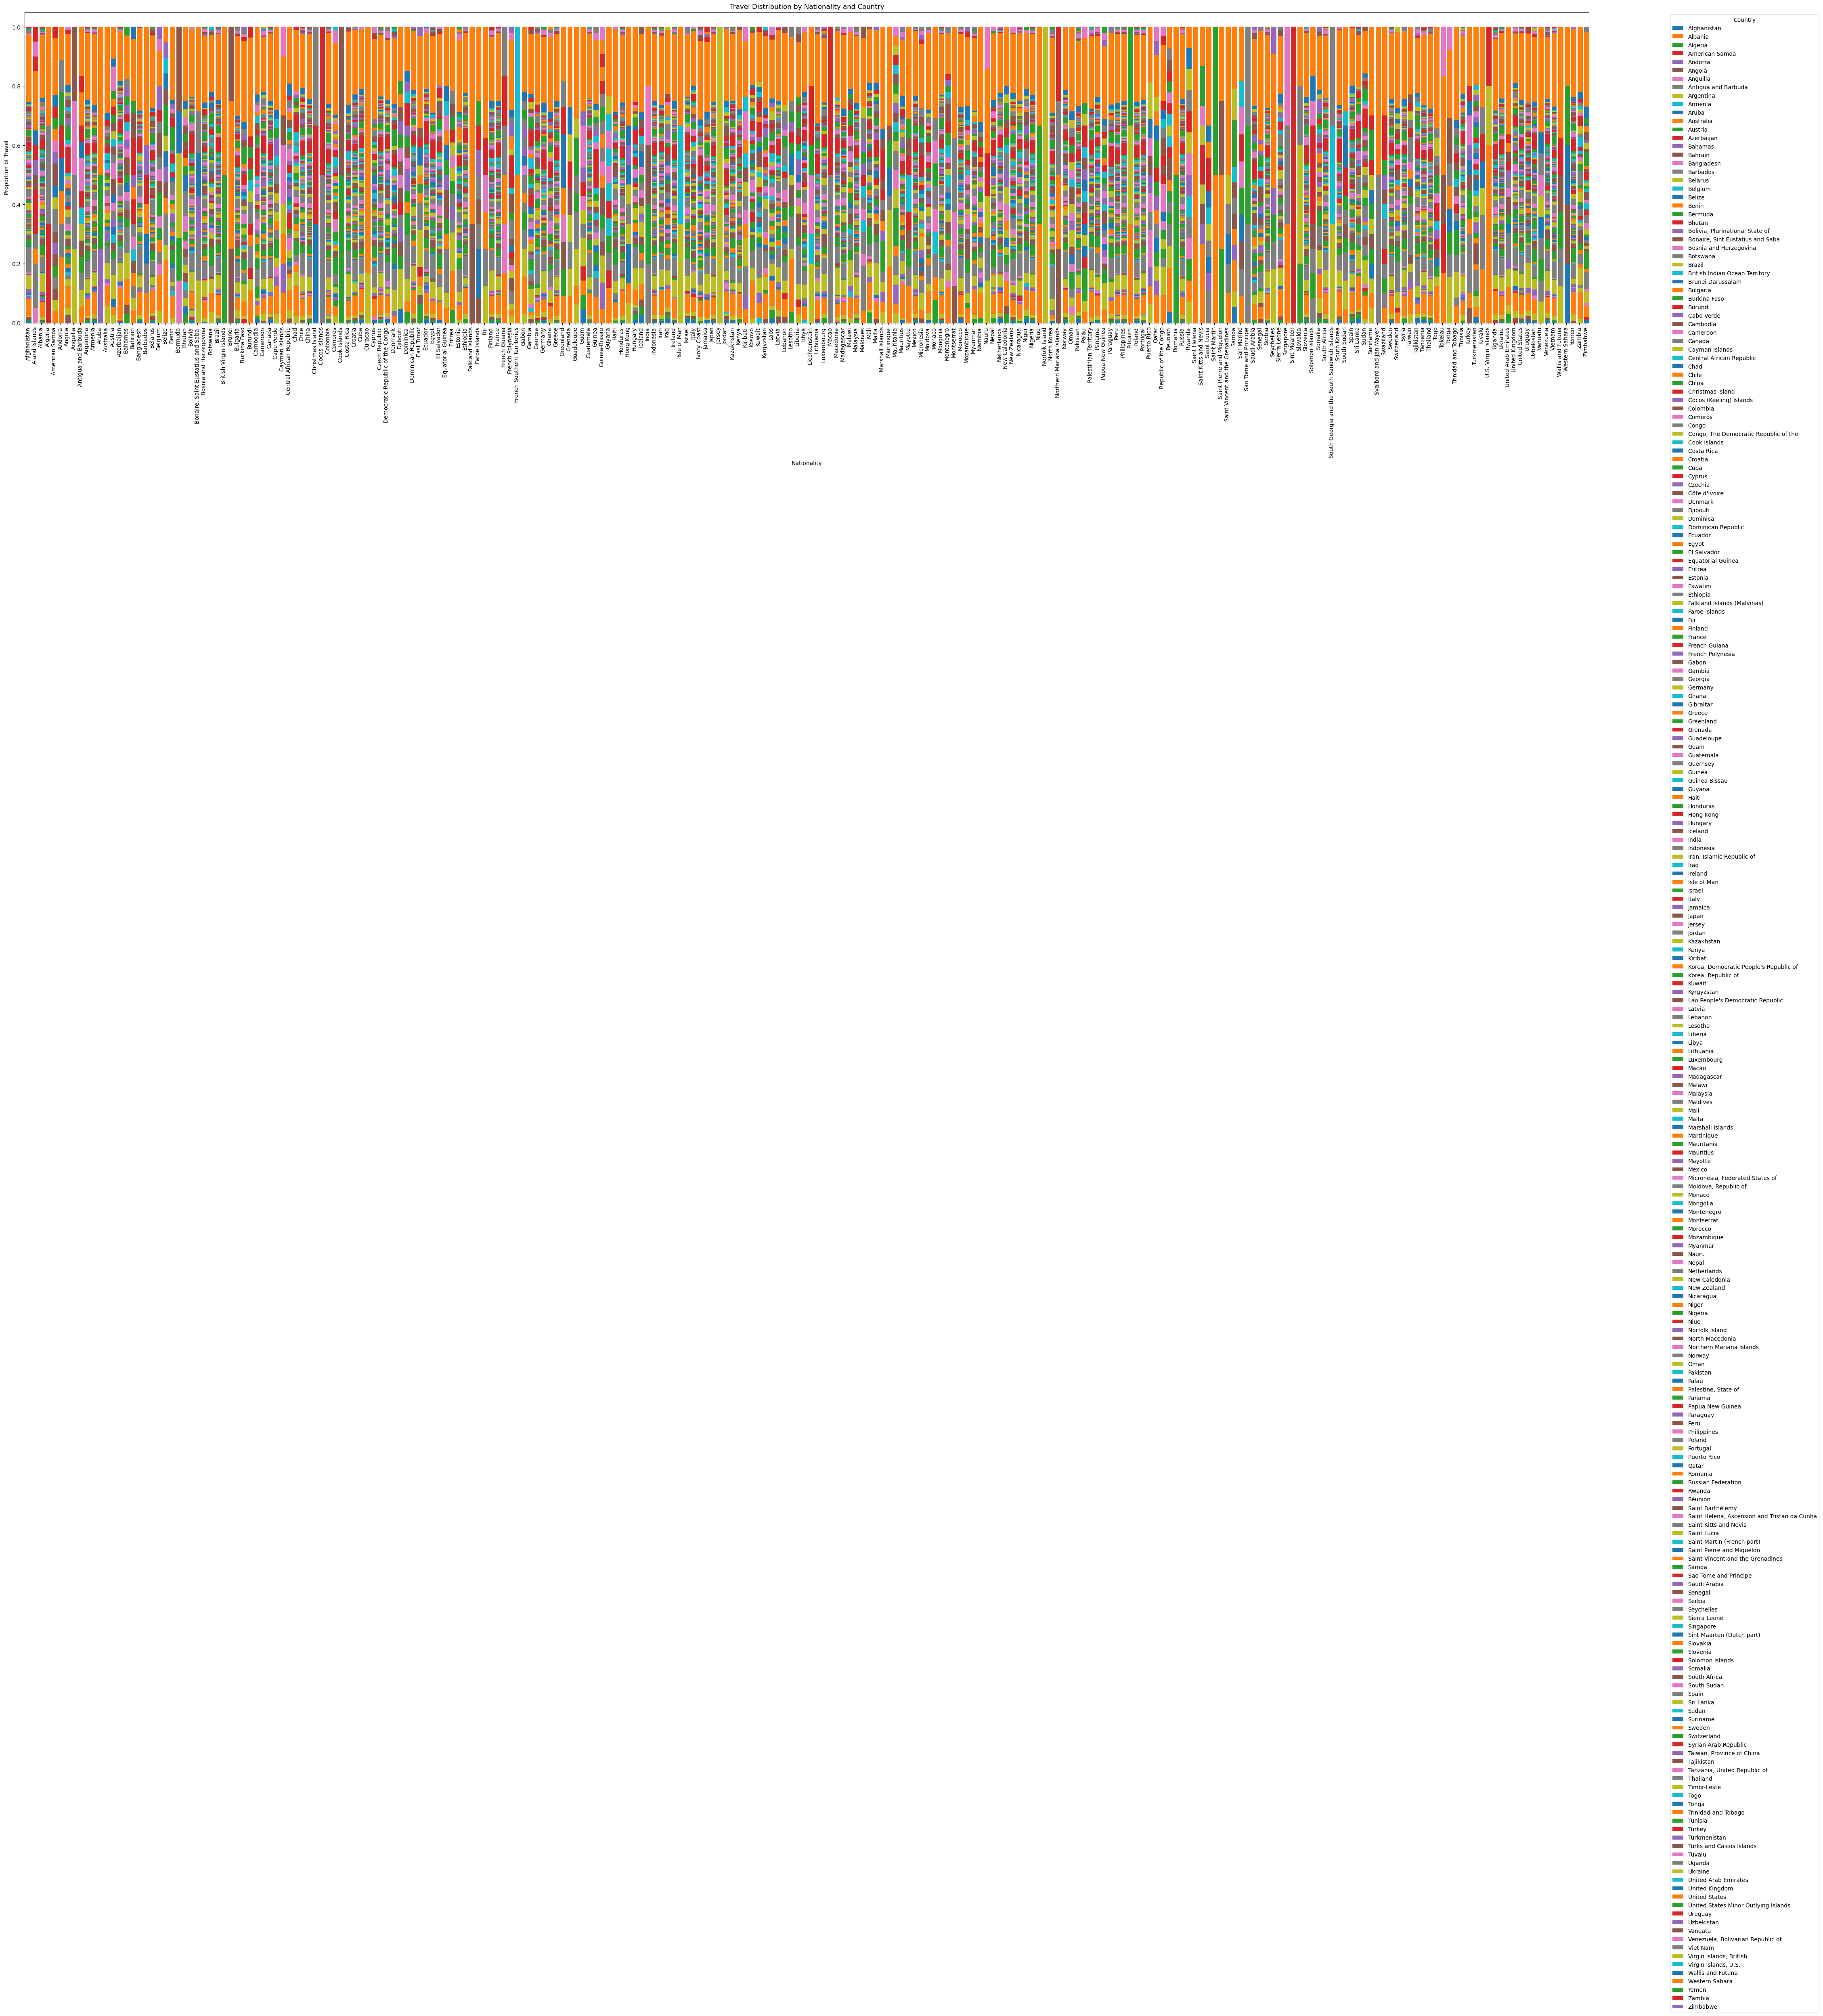

In [36]:
# Nationalities of people that are leaving specific countries (porportions)
nationalityCountryPreferences = df.groupby('Nationality')['Country Name'].value_counts(normalize=True).unstack()
ax = nationalityCountryPreferences.plot(kind='bar', stacked=True, figsize=(50,10))

for patch in ax.patches:
    patch.set_width(.8)

plt.xlabel('Nationality')
plt.ylabel('Proportion of Travel')
plt.title('Travel Distribution by Nationality and Country')
plt.legend(title='Country',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

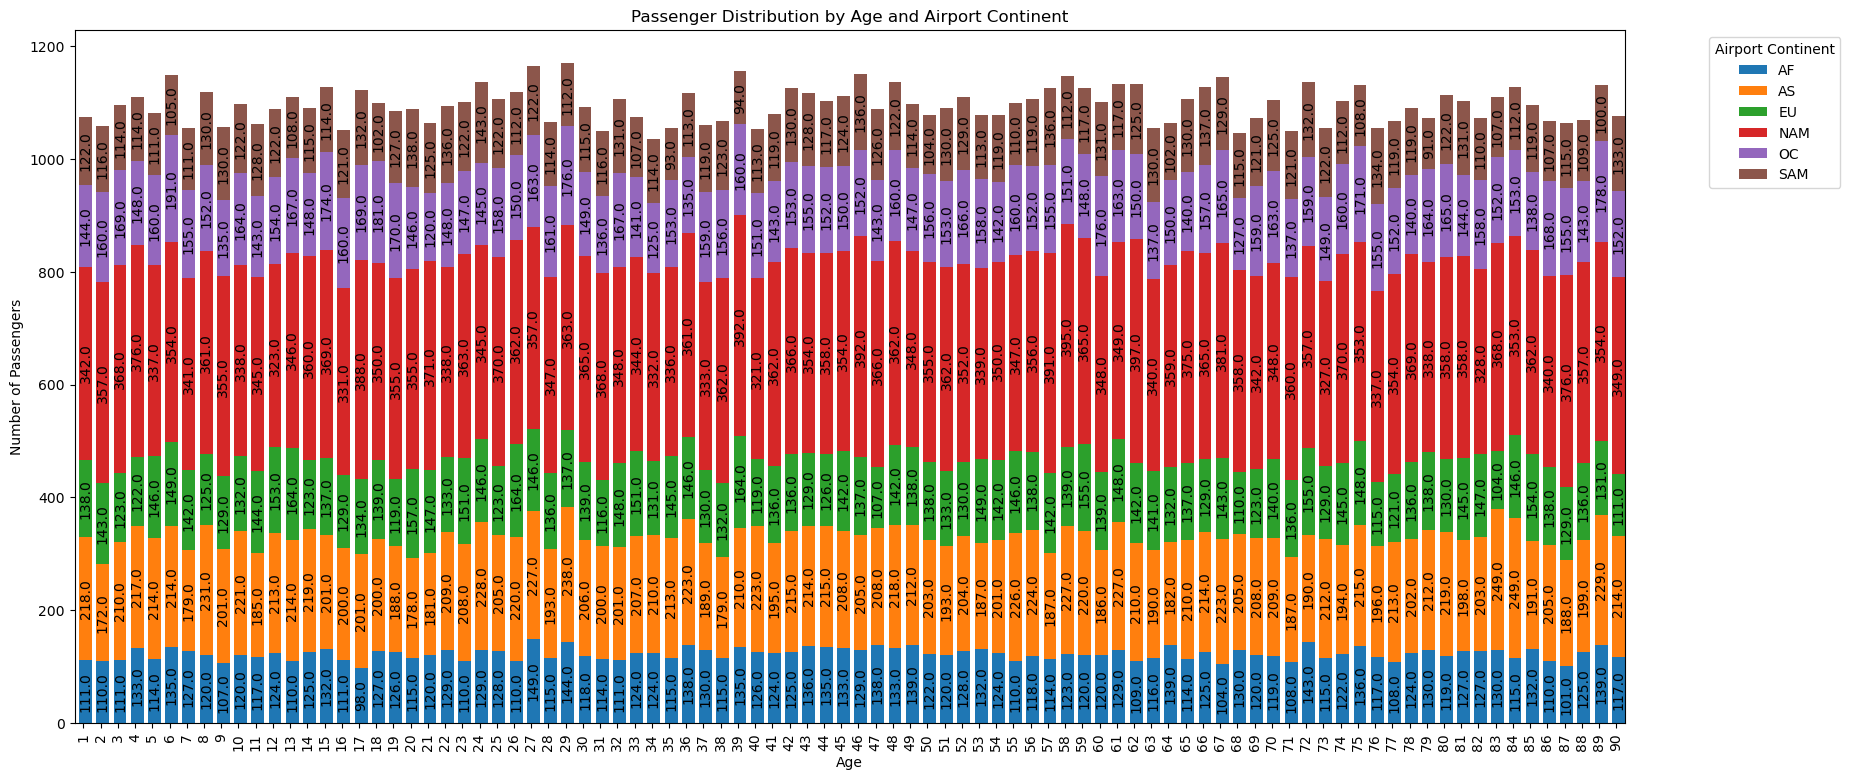

In [37]:
# Determines where most passengers of specific ages are traveling from
ageDeparturePreference = df.groupby(['Age', 'Airport Continent'])['Passenger ID'].count().unstack()
ax = ageDeparturePreference.plot(kind='bar', stacked=True, figsize=(20,9))

for patch in ax.patches:
    patch.set_width(.75)

# Annotate each bar with the total count
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', rotation=90)

plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Passenger Distribution by Age and Airport Continent')
plt.legend(title='Airport Continent',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [38]:
#Groupling all age groups to determine trends between age groups and gender
def createAgeGroup(age):
    if age < 0:
        return None
        
    if age < 12:
        return "Child"
    elif age < 18:
        return "Teen"
    elif age < 40:
        return "Adult"
    elif age < 65:
        return "Middle Aged"
    else:
        return "Senior"

df['Age Group'] = df['Age'].apply(createAgeGroup)

ageGroupAnalysis = df.groupby('Age Group')['Arrival Airport'].value_counts().unstack()
ageGroupAnalysis.fillna(0.0) #Filled in every NaN with 0.0

Arrival Airport,-,0,AAA,AAB,AAC,AAD,AAE,AAF,AAG,AAH,...,ZVG,ZVK,ZWA,ZWL,ZXT,ZYI,ZYL,ZZO,ZZU,ZZV
Age Group,,,,,,,,,,,,,,,,,,,,,
Adult,2.0,211.0,5.0,4.0,2.0,2.0,3.0,2.0,4.0,4.0,...,3.0,3.0,1.0,3.0,3.0,2.0,4.0,5.0,4.0,5.0
Child,2.0,101.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,3.0,0.0,1.0,1.0,2.0,3.0,3.0
Middle Aged,1.0,258.0,2.0,2.0,7.0,0.0,6.0,2.0,0.0,6.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0
Senior,2.0,239.0,2.0,7.0,3.0,5.0,0.0,3.0,5.0,3.0,...,2.0,3.0,3.0,6.0,4.0,5.0,7.0,1.0,2.0,4.0
Teen,1.0,64.0,0.0,0.0,1.0,3.0,2.0,0.0,2.0,1.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,1.0


Can we build a predictive model or predictive models to forecast the likelihood of the outcome of a flight status? What factors are the most significant in predicting flight delays and how can airlines mitigate them?

In [2]:
# RandomForestClassifier

# Data Preprocessing
encoder = LabelEncoder()
categorical_cols = ['Gender', 'Nationality', 'Airport Name', 'Airport Country Code', 
                    'Country Name', 'Airport Continent', 'Continents', 'Arrival Airport', 
                    'Pilot Name', 'Flight Status']

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Feature Selection
X = df.drop(['Passenger ID', 'First Name', 'Last Name', 'Departure Date', 'Flight Status'], axis=1)
y = df['Flight Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8888)

# Model Selection and Training
rf_model = RandomForestClassifier(n_estimators=100, random_state=8888)
rf_model.fit(X_train, y_train)

# Model Evaluation
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Percentage:", accuracy*100, "%")

Accuracy: 0.32959845873048066
Percentage: 32.95984587304807 %


In [3]:
# RandomForectClassifier but wanting to find how much each category impacts total accuracy of flight status

# Define categorical columns
categorical_cols = ['Gender', 'Nationality', 'Airport Name', 'Airport Country Code', 
                    'Country Name', 'Airport Continent', 'Continents', 'Arrival Airport', 
                    'Pilot Name']

# Initialize an empty dictionary to store accuracy for each categorical column
accuracy_by_category = {}

# Iterate through each categorical column
for col in categorical_cols:
    # Encode the categorical column
    X_cat = df[col].values.reshape(-1, 1)
    X_cat_encoded = encoder.fit_transform(X_cat)

    # Create new feature matrix X with the encoded categorical column
    X_with_cat = pd.concat([X, pd.DataFrame(X_cat_encoded, columns=[col])], axis=1)
    X_with_cat = X_with_cat.drop(col, axis=1)

    # Split data into training and testing sets
    X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_with_cat, y, test_size=0.2, random_state=8888)

    # Model Selection and Training
    rf_model_cat = RandomForestClassifier(n_estimators=100, random_state=8888)
    rf_model_cat.fit(X_train_cat, y_train_cat)

    # Model Evaluation
    y_pred_cat = rf_model_cat.predict(X_test_cat)
    accuracy_cat = accuracy_score(y_test_cat, y_pred_cat)

    # Store accuracy for the categorical column
    accuracy_by_category[col] = accuracy_cat

# Display accuracy and percentage for each categorical column
for col, acc in accuracy_by_category.items():
    print(f"Accuracy of flight status based on {col}: {acc}")
    print(f"Percentage for {col}: {acc*100}%")
    print()

D:\Anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Accuracy of flight status based on Gender: 0.33507402149665383
Percentage for Gender: 33.50740214966538%

Accuracy of flight status based on Nationality: 0.33451632528898806
Percentage for Nationality: 33.451632528898806%

Accuracy of flight status based on Airport Name: 0.3282802676941797
Percentage for Airport Name: 32.82802676941797%

Accuracy of flight status based on Airport Country Code: 0.33720340701683227
Percentage for Airport Country Code: 33.72034070168323%

Accuracy of flight status based on Country Name: 0.3319306428716285
Percentage for Country Name: 33.19306428716285%

Accuracy of flight status based on Airport Continent: 0.337456905293044
Percentage for Airport Continent: 33.7456905293044%

Accuracy of flight status based on Continents: 0.337456905293044
Percentage for Continents: 33.7456905293044%

Accuracy of flight status based on Arrival Airport: 0.33360373149462585
Percentage for Arrival Airport: 33.36037314946259%

Accuracy of flight status based on Pilot Name: 0.

In [4]:
# Confusion Matrix

# Feature Selection
X_columns = ['Gender', 'Age', 'Nationality', 'Airport Name', 'Airport Country Code', 
             'Country Name', 'Airport Continent', 'Continents', 'Arrival Airport', 
             'Pilot Name']
X = df[X_columns]
y = df['Flight Status']

# Split data into training and testing sets
X_train_cm, X_test_cm, y_train_cm, y_test_cm = train_test_split(X, y, test_size=0.2, random_state=8888)

# Model Selection and Training
rf_model_cm = RandomForestClassifier(n_estimators=100, random_state=8888)
rf_model_cm.fit(X_train_cm, y_train_cm)

# Model Evaluation
y_pred_cm = rf_model_cm.predict(X_test_cm)

# Calculate confusion matrix
conf_matrix_cm = confusion_matrix(y_test_cm, y_pred_cm)

print("Confusion Matrix based on specified columns:")
print(conf_matrix_cm)

Confusion Matrix based on specified columns:
[[2255 2152 2155]
 [2358 2141 2137]
 [2246 2175 2105]]
